In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Autoencoder-Modell
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # (B, 16, 14, 14)
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # (B, 32, 7, 7)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=7)  # (B, 64, 1, 1)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),  # (B, 32, 7, 7)
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # (B, 16, 14, 14)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # (B, 1, 28, 28)
            nn.Sigmoid()  # Werte zwischen 0 und 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [2]:
# Transformationen für die Bilder
transform = transforms.Compose([transforms.ToTensor()])

# MNIST-Datensatz laden
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3843109.46it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 280546.97it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1168078.89it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1503712.11it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
torch.cuda.is_available()

True

In [8]:
# Modell, Verlustfunktion und Optimierer
device = torch.device(0 if torch.cuda.is_available() else -1)
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data  # Bilder, Labels (Labels werden ignoriert)
        inputs = inputs.to(device)

        # Vorwärts- und Rückwärtsdurchlauf
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 0.0105
Epoch [2/10], Loss: 0.0068
Epoch [3/10], Loss: 0.0039
Epoch [4/10], Loss: 0.0037
Epoch [5/10], Loss: 0.0028
Epoch [6/10], Loss: 0.0026
Epoch [7/10], Loss: 0.0027
Epoch [8/10], Loss: 0.0023
Epoch [9/10], Loss: 0.0022
Epoch [10/10], Loss: 0.0023


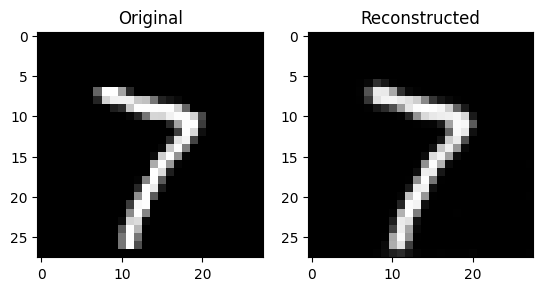

In [10]:
# Original- und rekonstruiertes Bild anzeigen
def show_images(model, data_loader):
    dataiter = iter(data_loader)
    images, _ = next(dataiter)
    images = images.to(device)

    # Vorhersage
    reconstructed = model(images).cpu().detach()

    # Originalbilder
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(images[0].cpu().squeeze(), cmap='gray')
    axes[0].set_title("Original")
    axes[1].imshow(reconstructed[0].squeeze(), cmap='gray')
    axes[1].set_title("Reconstructed")
    plt.show()

# Ergebnisse anzeigen
show_images(model, train_loader)
